In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\excel\heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

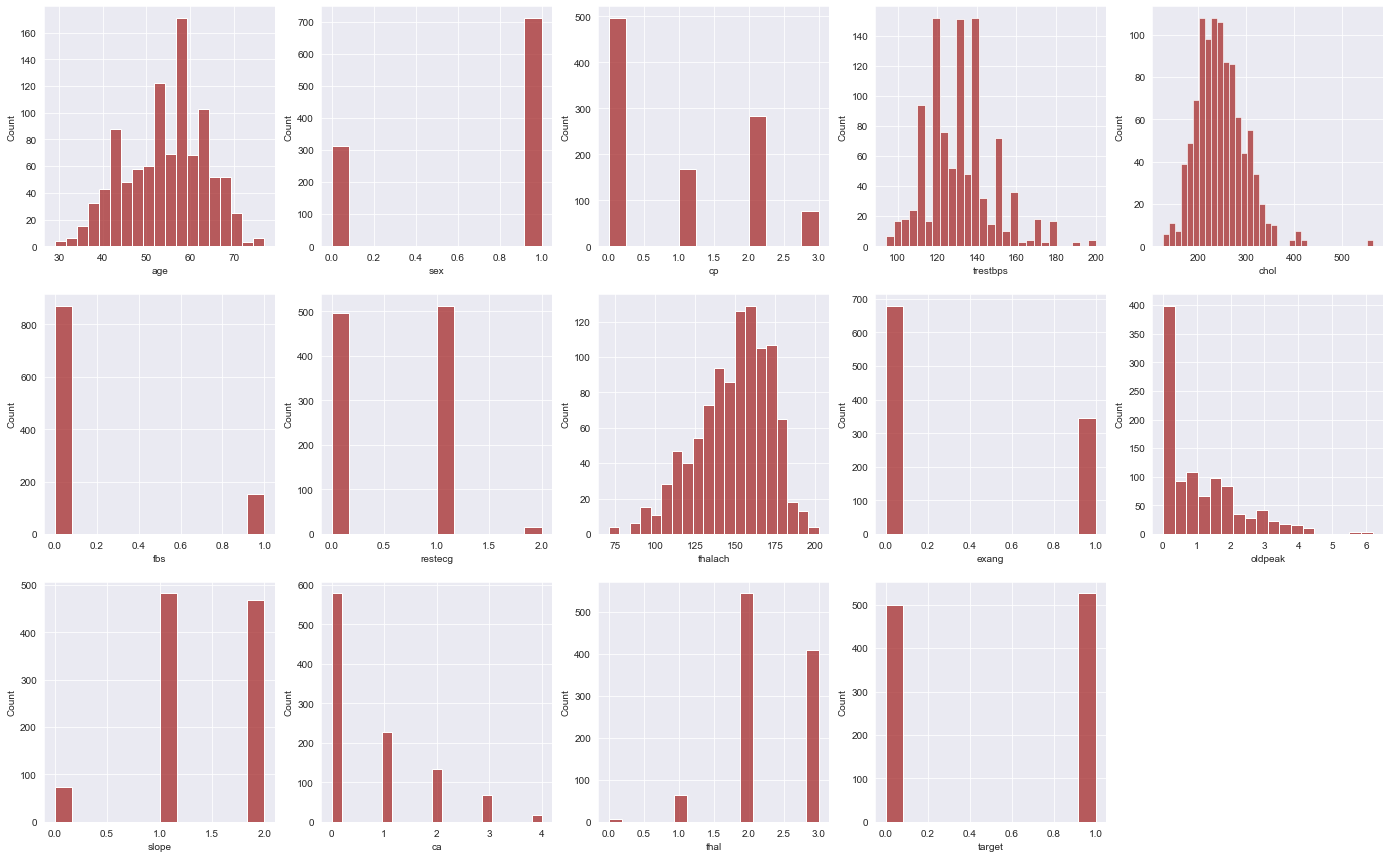

In [6]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (24,15))
i = 0
for column in df:
    sub = fig.add_subplot(3,5,i+1)
    chart = sns.histplot(data = df , x = column, color = 'brown')
    i= i+1

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

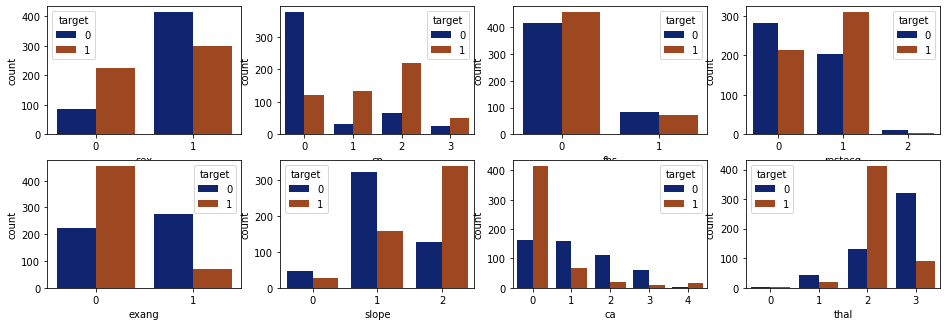

In [7]:
cat_list = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
fig = plt.figure(figsize = (16,8))
for i in range(len(cat_list)):
    column = cat_list[i]
    sub = fig.add_subplot(3,4,i+1)
    chart = sns.countplot(data =df, x =column, hue = 'target',palette = 'dark')


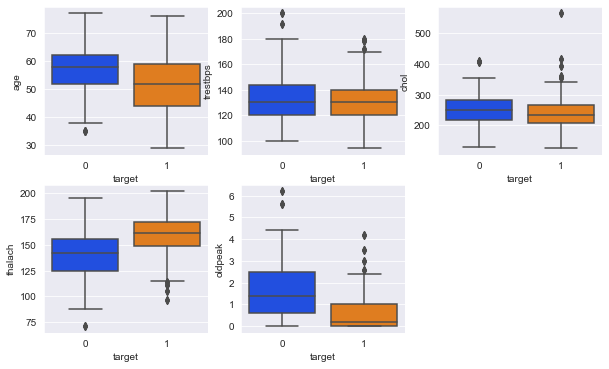

In [8]:
num_list = ['age', 'trestbps','chol','thalach','oldpeak']
fig = plt.figure(figsize = (10,6))
for i in range(len(num_list)):
    column = num_list[i]
    sub = fig.add_subplot(2,3,i+1)
    chart = sns.boxplot(data =df ,x = 'target', y = column, palette = 'bright')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [11]:
x = df.drop(['target'],axis=1)
y = df['target']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(solver = 'liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

In [14]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['Logistic Regression','SVM','KNN','Decision Tree','Random Forest','Naives Bayes']
acc_list = []
auc_list = []
cm_list =[]
for model in model_pipeline:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test,y_pred))
    fpr,tpr,_thresholds = metrics.roc_curve(y_test,y_pred)
    auc_list.append(round(metrics.auc(fpr,tpr),2))
    cm_list.append(confusion_matrix(y_test,y_pred))

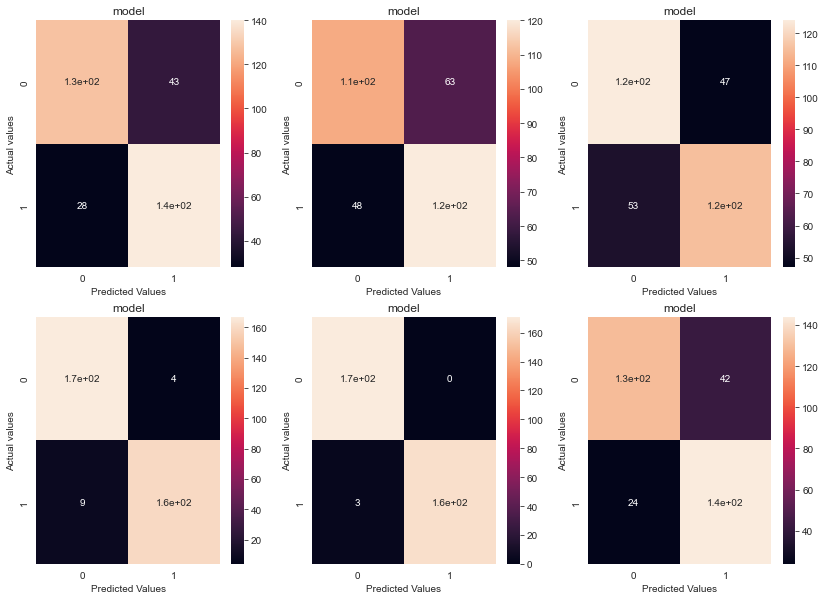

In [16]:
fig = plt.figure(figsize = (14,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title('model')
    matrix = sns.heatmap(cm, annot = True)
    matrix.set_xlabel('Predicted Values')
    matrix.set_ylabel('Actual values')